In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [251]:
df = pd.read_excel(R"C:\Users\kevca\Downloads\churn.xlsx")

In [252]:
print("\nFirst rows of the dataset:")
df.head()


First rows of the dataset:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [255]:
print("\nInformation on the dataset:")
df.info()


Information on the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 


In [257]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors ='coerce')
df['Total Charges'] = df['Total Charges'].astype(float)
df['Total Charges'] = df['Total Charges'].fillna(0)
df['Total Charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [259]:
df=df.drop(columns=['Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Reason'])
df.head()

,CustomerID,Count,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [261]:
df.isnull().sum()

CustomerID           0
Count                0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

Churn Value
0    5174
1    1869
Name: count, dtype: int64

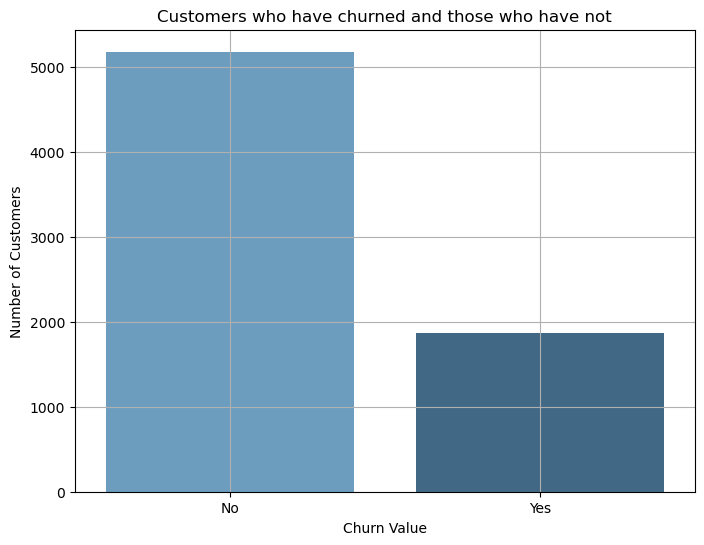

In [263]:
churn_counts = df['Churn Value'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Blues_d', ax=ax)
ax.set_title('Customers who have churned and those who have not')
ax.set_ylabel('Number of Customers')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
plt.grid(True)

churn_counts

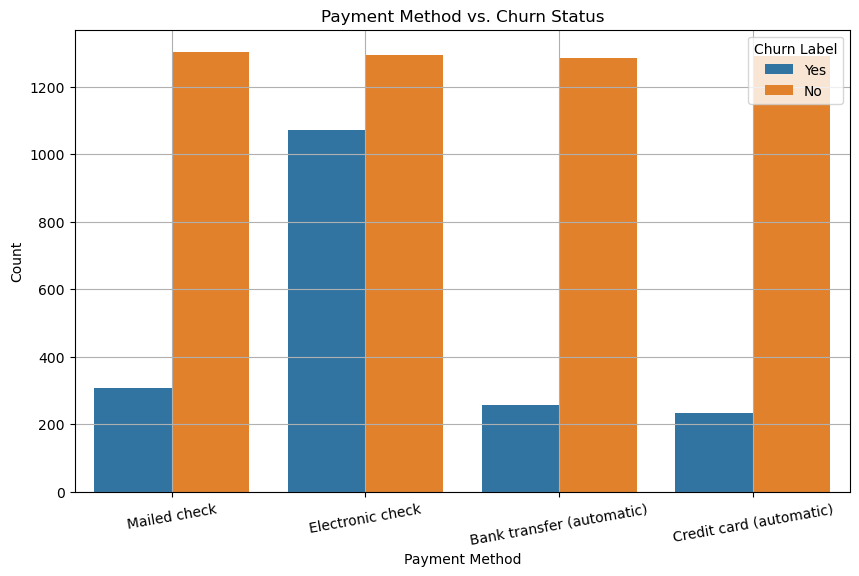

In [265]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', hue='Churn Label', data=df)
plt.title('Payment Method vs. Churn Status')
plt.ylabel('Count')
plt.xlabel('Payment Method')
plt.xticks(rotation=10)
plt.grid(True)
plt.show()

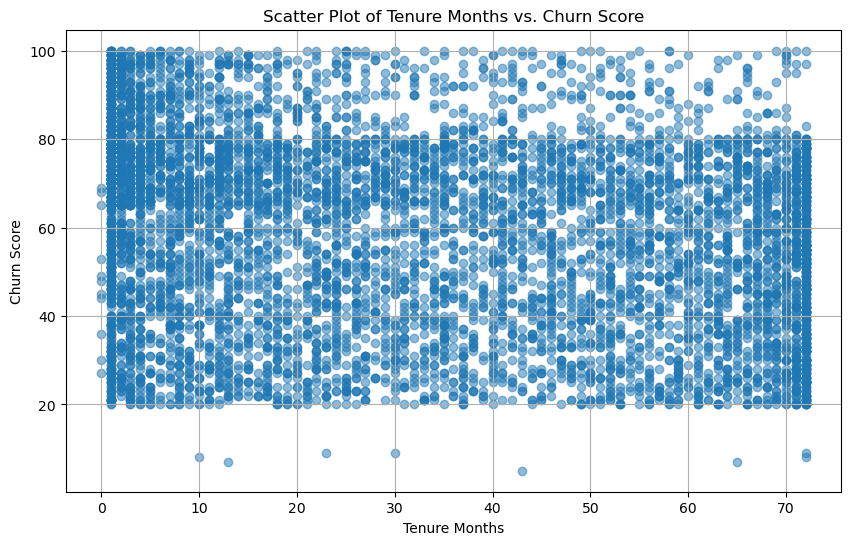

In [267]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tenure Months'], df['Churn Score'], alpha=0.5)
plt.title('Scatter Plot of Tenure Months vs. Churn Score')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Score')
plt.grid(True)
plt.show()

C:\Users\kevca\AppData\Local\Temp\ipykernel_48648\2532483159.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('Tenure Group')['Churn Value'].mean()


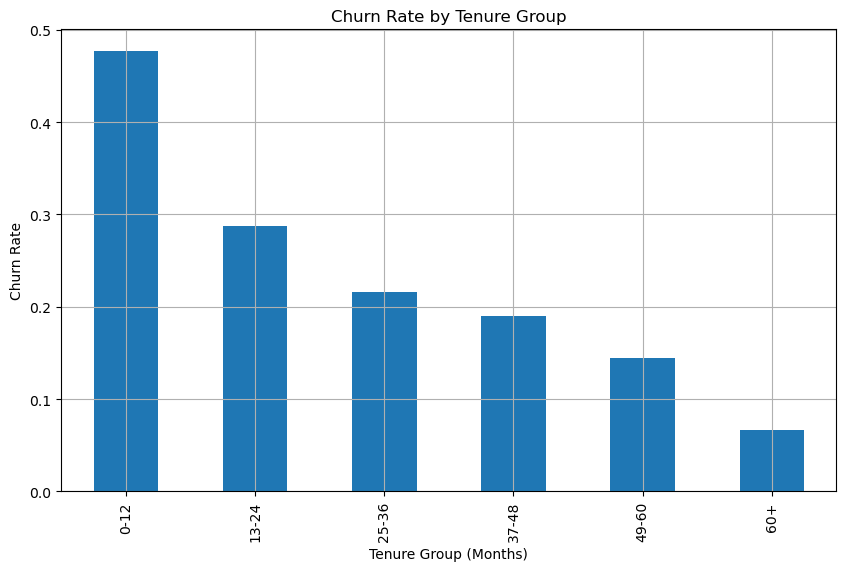

In [269]:
df['Tenure Group'] = pd.cut(df['Tenure Months'], bins=[0, 12, 24, 36, 48, 60, df['Tenure Months'].max()], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])

churn_by_tenure = df.groupby('Tenure Group')['Churn Value'].mean()

plt.figure(figsize=(10, 6))
churn_by_tenure.plot(kind='bar')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group (Months)')
plt.grid(True)
plt.show()

Contract,Month-to-month,One year,Two year
Payment Method,,,
Bank transfer (automatic),0.341256,0.097187,0.033688
Credit card (automatic),0.327808,0.103015,0.022375
Electronic check,0.537297,0.184438,0.077381
Mailed check,0.315789,0.068249,0.007853


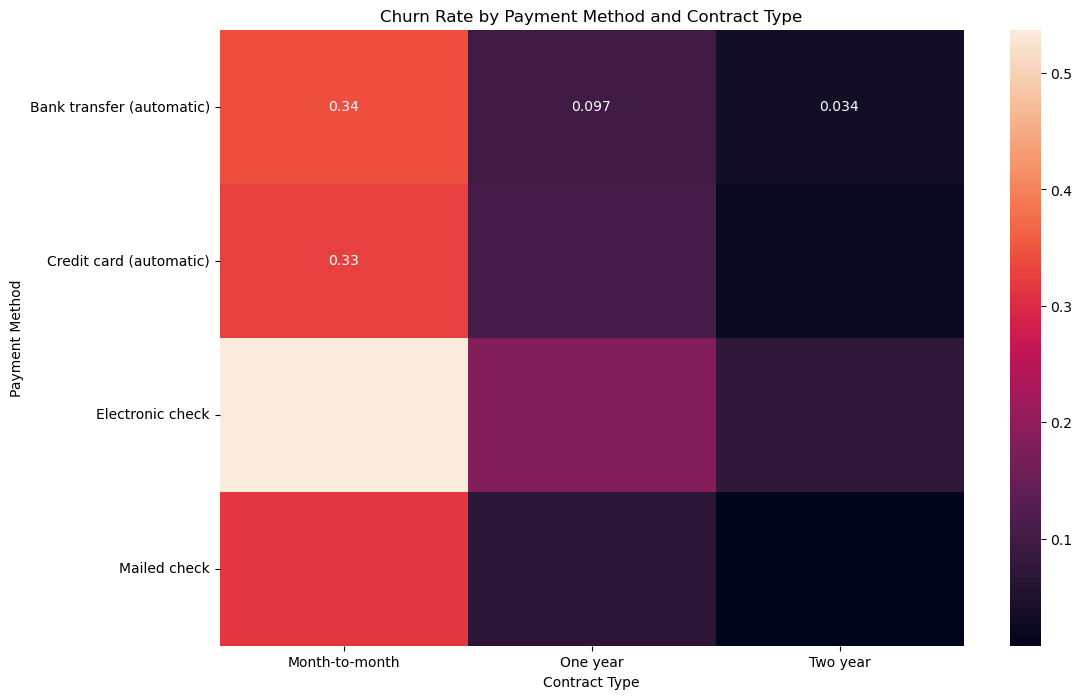

In [271]:
churn_data = df.pivot_table(values='Churn Value', index='Payment Method', columns='Contract', aggfunc='mean')


plt.figure(figsize=(12, 8))
sns.heatmap(churn_data, annot=True)
plt.title("Churn Rate by Payment Method and Contract Type")
plt.ylabel("Payment Method")
plt.xlabel("Contract Type")
churn_data

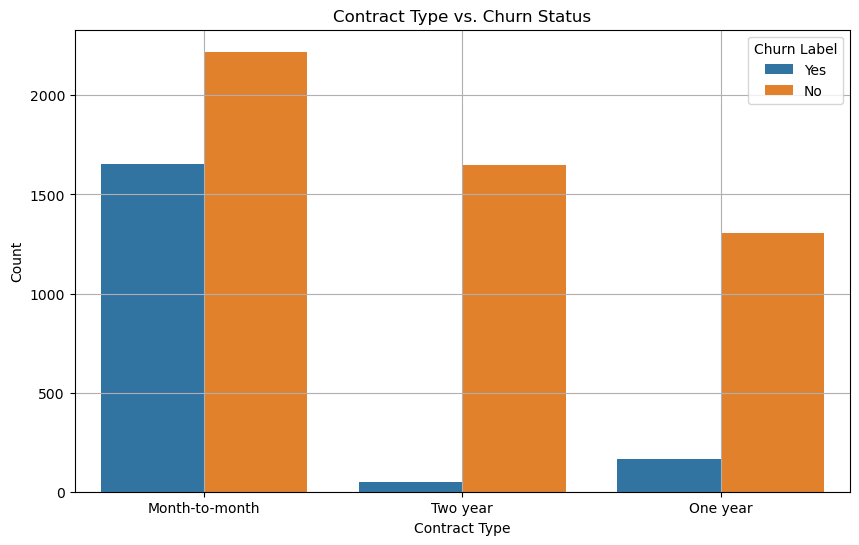

In [273]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Contract Type vs. Churn Status')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.grid(True)
plt.show()

In [305]:
X = df[['Tenure Months', 'Total Charges', 'Churn Score', 'CLTV']]
y = df['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
{"SVM Accuracy": svm_accuracy}


{'SVM Accuracy': 0.8991954566966398}

In [307]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
{"Logistic Regression Accuracy": logistic_accuracy}


{'Logistic Regression Accuracy': 0.882158069096072}

In [311]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

{"Random Forest Accuracy": random_forest_accuracy}

{'Random Forest Accuracy': 0.9110269758637008}

In [324]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

svm_model = SVC()
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=kfold)
{"SVM Cross-Validation Accuracy": svm_cv_scores.mean()}

{'SVM Cross-Validation Accuracy': 0.908924949290061}

In [326]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=kfold)
{"Logistic Regression Cross-Validation Accuracy": logistic_cv_scores.mean()}

{'Logistic Regression Cross-Validation Accuracy': 0.9006085192697769}

In [328]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=kfold)
{"Random Forest Cross-Validation Accuracy": random_forest_cv_scores.mean()}

{'Random Forest Cross-Validation Accuracy': 0.9188640973630833}

In [334]:
new_inputs = [
    [5, 200.0, 45, 2500],  
    [50, 5000.0, 90, 6000],  
    [25, 2500.0, 55, 4000],  
    [70, 7000.0, 20, 5000],  
    [10, 1000.0, 80, 3500]
]

prediction_labels = ["to churn" if pred == 1 else "not to churn" for pred in new_predictions]
prediction_labels

new_inputs_scaled = scaler.transform(new_inputs)

new_predictions = random_forest_model.predict(new_inputs_scaled)

print(new_predictions, prediction_labels)

C:\Users\kevca\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.